In [ ]:
from Modified_DE import *
from original_differencial_evolution_algorithm import *

population =[10,10,10,10,10,30,30,30,30,30,50,50,50,50,50,70,70,70,70,70,90,90,90,90,90]
iterations =[10,30,50,70,90,10,30,50,70,90,10,30,50,70,90,10,30,50,70,90,10,30,50,70,90]
function_names = ['sphare', 'Rastrigin', 'Ackley', 'Rosenbrock', 'Beale', 'Goldstein_Price', 'bohachevsky', 'booth', 'matyas', 'zakharov', 'six_hump']

for popsize, N, fn in zip(population, iterations, function_names):
    best_eval, best_sol, end = Original_DE(popsize, fn, N, MaxItr=1, beta_min=0, beta_max=1, pCR=0.25, lower=-30, upper=30)
    print()
    print(f"Best evaluation {fn}:", best_eval)
    print(f"Best solution {fn}:", best_sol)
    print(f"Time {fn}:", end)


In [ ]:
for popsize, N, fn in zip(population, iterations, function_names):
    best_eval, best_sol, end = Mordified_DE(popsize, fn, N, MaxItr=1,lower=-30, upper=30)
    print()
    print(f"Best evaluation {fn}:", best_eval)
    print(f"Best solution {fn}:", best_sol)
    print(f"Time {fn}:", end)

In [22]:
import csv

data = {
    'sphare',
    'Rastrigin',
    'Ackley',
    'Rosenbrock',
    'Beale',
    'Goldstein_Price',
    'bohachevsky',
    'booth',
    'matyas',
    'zakharov',
    'six_hump'
}

# Specify the file name
filename = 'data.csv'

# Open the file in write mode
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(['Function'])

    # Write the data rows
    for function in data:
        writer.writerow([function])

print("Data has been saved to", filename)


Data has been saved to data.csv


In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from pylab import *


In [24]:
import csv

data = [
    ["Trails", "Population", "Iterations"],
    [1, 10, 10],
    [2, 10, 30],
    [3, 10, 50],
    [4, 10, 70],
    [5, 10, 90],
    [6, 30, 10],
    [7, 30, 30],
    [8, 30, 50],
    [9, 30, 70],
    [10, 30, 90],
    [11, 50, 10],
    [12, 50, 30],
    [13, 50, 50],
    [14, 50, 70],
    [15, 50, 90],
    [16, 70, 10],
    [17, 70, 30],
    [18, 70, 50],
    [19, 70, 70],
    [20, 70, 90],
    [21, 90, 10],
    [22, 90, 30],
    [23, 90, 50],
    [24, 90, 70],
    [25, 90, 90]
]

filename = "doe.csv"

# Writing the data to a CSV file
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("CSV file created successfully.")


CSV file created successfully.


In [25]:
with open('data.csv', 'r') as fl:
    contents = fl.readlines()[1:]
DOE_table = pd.read_csv('doe.csv')
# eval_lst = []
results = pd.DataFrame()
# Loop over the required functions   
for j in contents:   
    # The output list is to save the output of applying DE using DOE trail on the current j function
    output = []
    for i in range(len(DOE_table)):
        trail = list(DOE_table.iloc[i, :])
        pop_size = trail[1]
        iteration_num = trail[2] 
        sol = Mordified_DE(pop_size, j[:-1], 5, iteration_num)
        # Equation 8 in the paper
        # output.append(0.6 * sol[0] + 0.4 * sol[2])
        output.append(sol[0] - 1/ (1+ sol[2]))
        
    results[j[:-1]] = output


In [26]:
results

,Ackley,matyas,sphare,Beale,booth,Goldstein_Price,Rastrigin,six_hump,Rosenbrock,zakharov,bohachevsky
0,6.309307,-0.979948,7.406683,-0.710746,1.252644,3.476571,11.939171,-1.945310,7389.771393,-5.560356,-0.856672
1,5.930931,-0.984287,0.381014,-0.984264,-0.983324,2.187451,-0.948825,-2.013031,200.967073,-7.138910,-0.979513
2,8.267759,-0.974725,-0.935553,-0.972831,-0.972836,2.031894,-0.959127,-2.001639,39.210798,-7.125725,-0.966242
3,0.704597,-0.963485,-0.961627,-0.963486,-0.965338,29.041094,-0.929287,-1.987764,2.552229,-7.114642,-0.955254
4,7.445702,-0.955223,-0.952267,-0.952491,-0.955223,2.053790,-0.906847,-1.977838,63.015850,-7.106448,-0.941766
5,4.354991,-0.979453,2.960651,-0.847002,-0.927674,154.947327,12.132898,-1.668859,2158.180246,-7.088640,-0.842680
6,-0.494922,-0.953405,-0.945303,-0.950687,-0.952530,2.054754,-0.914264,-1.976958,11.564389,-7.100159,-0.940001
7,-0.881301,-0.923550,-0.918474,-0.452880,-0.922672,2.089890,-0.879788,-1.941764,-0.402167,-7.070137,-0.903575
8,-0.844933,-0.895506,-0.889156,-0.891524,-0.896309,2.120184,-0.826830,-1.912191,-0.826977,-7.035647,-0.869866
9,-0.810128,-0.870622,-0.860932,-0.866109,-0.869866,2.147173,-0.780505,-1.875841,-0.825828,-7.009526,-0.837201


In [27]:
normalized = results / results.sum(0)

In [28]:
normalized

,Ackley,matyas,sphare,Beale,booth,Goldstein_Price,Rastrigin,six_hump,Rosenbrock,zakharov,bohachevsky
0,0.199919,0.044627,-5.315171,0.034869,-0.064682,0.011947,0.558363,0.041749,0.547022,0.032009,0.040838
1,0.187930,0.044825,-0.273422,0.048288,0.050775,0.007517,-0.044374,0.043203,0.014876,0.041096,0.046694
2,0.261975,0.044389,0.671370,0.047727,0.050233,0.006982,-0.044856,0.042958,0.002903,0.041020,0.046062
3,0.022326,0.043877,0.690081,0.047268,0.049846,0.099794,-0.043460,0.042660,0.000189,0.040956,0.045538
4,0.235927,0.043501,0.683364,0.046729,0.049324,0.007057,-0.042411,0.042447,0.004665,0.040909,0.044895
5,0.137994,0.044604,-2.124618,0.041554,0.047901,0.532445,0.567423,0.035816,0.159757,0.040806,0.040171
6,-0.015682,0.043418,0.678367,0.046640,0.049185,0.007061,-0.042758,0.042429,0.000856,0.040872,0.044811
7,-0.027925,0.042059,0.659114,0.022218,0.047643,0.007181,-0.041145,0.041673,-0.000030,0.040700,0.043074
8,-0.026773,0.040781,0.638075,0.043738,0.046282,0.007286,-0.038669,0.041039,-0.000061,0.040501,0.041467
9,-0.025670,0.039648,0.617820,0.042491,0.044917,0.007378,-0.036502,0.040258,-0.000061,0.040351,0.039910


In [29]:
normalized.to_csv('normalized_data.csv')

In [30]:
# combine two tables using concat method
# It takes the two tables and convert them as a list
# the axis parameter equals to one to consider each table as a column
normalized_with_trails = pd.concat([DOE_table, normalized], axis=1)

In [31]:
normalized_with_trails.to_csv('normalized_trails.csv')

In [32]:
pop_levels = normalized_with_trails['Population'].unique()
pop_levels_responses = pd.DataFrame()
pop_levels_responses['levels'] = []
pop_levels_responses['responses'] = []
for i in pop_levels:
    level_tabled_data = normalized_with_trails.loc[normalized_with_trails['Population'] == i].iloc[:, 2:]
    level_data = level_tabled_data.values.flatten()
    levels = len(level_data) * (' ' + str(i)).split()
    pop_levels_responses = pd.concat([pop_levels_responses, pd.DataFrame({'levels':levels, 'responses':level_data})], axis=0)

pop_levels_responses.to_csv('population_levels.csv', index = False)
pop_levels = normalized_with_trails['Iterations'].unique()
pop_levels_responses = pd.DataFrame()
pop_levels_responses['levels'] = []
pop_levels_responses['responses'] = []
for i in pop_levels:
    level_tabled_data = normalized_with_trails.loc[normalized_with_trails['Iterations'] == i].iloc[:, 2:]
    level_data = level_tabled_data.values.flatten()
    levels = len(level_data) * (' ' + str(i)).split()
    pop_levels_responses = pd.concat([pop_levels_responses, pd.DataFrame({'levels':levels, 'responses':level_data})], axis=0)

pop_levels_responses.to_csv('iterations_levels.csv', index = False)
x = pd.DataFrame({'name':[], 'number':[]})
y = ['Richard', 'Baah']
z = [1, 2]
x = pd.concat([x, pd.DataFrame({'name': y,'number': z})],axis=0)
x = pd.concat([x, pd.DataFrame({'name': y,'number': z})],axis=0)

In [33]:
import csv

data = [
    ["Trails", "Population", "Iterations"],
    [1, 10, 10],
    [2, 10, 15],
    [3, 10, 20],
    [4, 10, 25],
    [5, 10, 30] 
]

filename = "doe2.csv"

# Writing the data to a CSV file
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("CSV file created successfully.")


CSV file created successfully.


In [34]:
with open('data.csv', 'r') as fl:
    contents = fl.readlines()[1:]
DOE_table = pd.read_csv('doe2.csv')
# eval_lst = []
results2 = pd.DataFrame()
# Loop over the required functions   
for j in contents:   
    # The output list is to save the output of applying DE using DOE trail on the current j function
    output = []
    for i in range(len(DOE_table)):
        trail = list(DOE_table.iloc[i, :])
        pop_size = trail[1]
        iteration_num = trail[2] 
        sol = Mordified_DE(pop_size, j[:-1], 5, iteration_num)
        # Equation 8 in the paper
        # output.append(0.6 * sol[0] + 0.4 * sol[2])
        output.append(sol[0] - 1/ (1+ sol[2]))
        
    results2[j[:-1]] = output


In [35]:
results2

,Ackley,matyas,sphare,Beale,booth,Goldstein_Price,Rastrigin,six_hump,Rosenbrock,zakharov,bohachevsky
0,9.794159,-0.981843,19.154026,-0.500941,-0.991852,1418.388845,12.010259,-1.678653,10504.534757,-7.138028,-0.955251
1,13.287633,-0.975338,20.341749,0.058709,-0.955726,31.417857,-0.785140,-1.928865,18641.103430,-7.125682,-0.985408
2,3.988134,-0.988135,1.033316,-0.988201,-0.985950,2.270238,-0.826605,-2.018935,190.584187,-7.144217,-0.977073
3,2.352639,-0.986264,-0.854724,-0.981189,-0.987191,83.039510,9.173809,-2.017829,182.823773,-7.142788,-0.985291
4,5.989722,-0.984294,-0.482500,0.319464,-0.984287,2.102275,-0.407561,-2.014733,110.487001,-7.139926,-0.982364


In [36]:
normalized2 = results2 / results2.sum(0)

In [37]:
normalized2

,Ackley,matyas,sphare,Beale,booth,Goldstein_Price,Rastrigin,six_hump,Rosenbrock,zakharov,bohachevsky
0,0.276575,0.199729,0.488725,0.239437,0.202212,0.922698,0.626684,0.173791,0.354529,0.199997,0.195532
1,0.375227,0.198406,0.519030,-0.028061,0.194847,0.020438,-0.040968,0.199696,0.629139,0.199651,0.201705
2,0.112620,0.201009,0.026366,0.472336,0.201009,0.001477,-0.043131,0.209021,0.006432,0.200171,0.199999
3,0.066436,0.200628,-0.021809,0.468984,0.201262,0.054019,0.478681,0.208906,0.006170,0.200131,0.201681
4,0.169142,0.200228,-0.012311,-0.152696,0.200670,0.001368,-0.021266,0.208586,0.003729,0.200050,0.201082


In [38]:
normalized2.to_csv('normalized_data2.csv')

In [39]:
# combine two tables using concat method
# It takes the two tables and convert them as a list
# the axis parameter equals to one to consider each table as a column
normalized_with_trails2 = pd.concat([DOE_table, normalized2], axis=1)

In [40]:
normalized_with_trails2.to_csv('normalized_trails2.csv')

In [41]:
pop_levels = normalized_with_trails2['Population'].unique()
pop_levels_responses = pd.DataFrame()
pop_levels_responses['levels'] = []
pop_levels_responses['responses'] = []
for i in pop_levels:
    level_tabled_data = normalized_with_trails2.loc[normalized_with_trails2['Population'] == i].iloc[:, 2:]
    level_data = level_tabled_data.values.flatten()
    levels = len(level_data) * (' ' + str(i)).split()
    pop_levels_responses = pd.concat([pop_levels_responses, pd.DataFrame({'levels':levels, 'responses':level_data})], axis=0)

pop_levels_responses.to_csv('population_levels2.csv', index = False)
pop_levels = normalized_with_trails2['Iterations'].unique()
pop_levels_responses = pd.DataFrame()
pop_levels_responses['levels'] = []
pop_levels_responses['responses'] = []
for i in pop_levels:
    level_tabled_data = normalized_with_trails2.loc[normalized_with_trails2['Iterations'] == i].iloc[:, 2:]
    level_data = level_tabled_data.values.flatten()
    levels = len(level_data) * (' ' + str(i)).split()
    pop_levels_responses = pd.concat([pop_levels_responses, pd.DataFrame({'levels':levels, 'responses':level_data})], axis=0)

pop_levels_responses.to_csv('iterations_levels2.csv', index = False)
x = pd.DataFrame({'name':[], 'number':[]})
y = ['Richard', 'Baah']
z = [1, 2]
x = pd.concat([x, pd.DataFrame({'name': y,'number': z})],axis=0)
x = pd.concat([x, pd.DataFrame({'name': y,'number': z})],axis=0)

In [42]:
import numpy as np
from Modified_DE import *
from original_differencial_evolution_algorithm import Original_DE,Original_DE_2,Original_DE_3
import pandas as pd

PopSize = 50
N = 5
MaxItr = 150


function_names = ['sphare', 'Rastrigin', 'Ackley', 'Rosenbrock', 'Beale', 'Goldstein_Price', 'bohachevsky', 'booth', 'matyas', 'zakharov', 'six_hump']

algorithms = [Mordified_DE, Original_DE, Original_DE_2, Original_DE_3]

results = {algorithm.__name__: [] for algorithm in algorithms}

for algorithm in algorithms:
    for function_name in function_names:
        outputs = []
        for i in range(PopSize):
            besteval, bestsol, end = algorithm(PopSize, function_name, N, MaxItr, lower=-30, upper=30)
            outputs.append(besteval - 1/ (1+ end))
        results[algorithm.__name__].append(outputs)

mean_values = {algorithm: np.mean(np.array(results[algorithm.__name__]), axis=1) for algorithm in algorithms}
deviation_values = {algorithm: np.std(np.array(results[algorithm.__name__]), axis=1) for algorithm in algorithms}


# Create DataFrames for raw results
raw_results_df = pd.DataFrame(results)

# Save raw results DataFrame to CSV
raw_results_df.to_csv('raw_results.csv', index_label='Function')

# Create DataFrames for mean and standard deviation values
mean_df = pd.DataFrame(mean_values, columns=algorithms, index=function_names)
deviation_df = pd.DataFrame(deviation_values, columns=algorithms, index=function_names)

# Save mean values DataFrame to CSV
mean_df.to_csv('mean_values.csv')

# Save standard deviation values DataFrame to CSV
deviation_df.to_csv('deviation_values.csv')




# function_names = ['sphare', 'Rastrigin', 'Ackley', 'Rosenbrock', 'Beale', 'Goldstein_Price', 'bohachevsky', 'booth', 'matyas', 'zakharov', 'six_hump']

# results = []

# for function_name in function_names:
#     outputs = []
#     for i in range(PopSize):
#         besteval, bestsol, end =(Mordified_DE(PopSize, function_name, N, MaxItr, lower=-30, upper=30))
        
#          # Equation 8 in the paper
#         # output.append(0.6 * sol[0] + 0.4 * sol[2])
#         outputs.append(besteval - 1/ (1+ end))
#     results.append(outputs)

# results_array = np.array(results)

# mean_values = np.mean(results_array, axis=1)  # Calculate mean along axis 1 (function index)
# deviation_values = np.std(results_array, axis=1)  # Calculate standard deviation along axis 1 (function index)


# for i, function_name in enumerate(function_names):
#     print(f"Function: {function_name}")
#     print(f"Mean: {mean_values[i]}")
#     print(f"Standard Deviation: {deviation_values[i]}\n")

In [43]:
mean_df


,<function Mordified_DE at 0x000001D6DCE9A050>,<function Original_DE at 0x000001D6DCE9AB90>,<function Original_DE_2 at 0x000001D6DCE9ACB0>,<function Original_DE_3 at 0x000001D6DCE9AD40>
sphare,-0.651871,-0.701449,-0.700543,-0.697490
Rastrigin,-0.590993,-0.648277,-0.643530,-0.639691
Ackley,-0.582757,-0.605379,-0.597985,-0.570370
Rosenbrock,-0.188257,-0.419488,0.490418,0.173080
Beale,-0.658027,-0.709753,-0.711379,-0.660261
Goldstein_Price,2.336030,2.308443,2.314875,2.317242
bohachevsky,-0.665597,-0.693495,-0.688861,-0.683330
booth,-0.686876,-0.714203,-0.722376,-0.717002
matyas,-0.682902,-0.708743,-0.722716,-0.722605
zakharov,-6.835785,-6.870302,-6.870972,-6.869120


In [44]:
deviation_df


,<function Mordified_DE at 0x000001D6DCE9A050>,<function Original_DE at 0x000001D6DCE9AB90>,<function Original_DE_2 at 0x000001D6DCE9ACB0>,<function Original_DE_3 at 0x000001D6DCE9AD40>
sphare,0.023613,0.014125,0.017115,0.013070
Rastrigin,0.015078,0.009955,0.014646,0.014406
Ackley,0.020133,0.016436,0.015428,0.229637
Rosenbrock,1.278592,0.932978,2.059009,1.627172
Beale,0.091765,0.013454,0.011314,0.137064
Goldstein_Price,0.012857,0.014597,0.012112,0.012618
bohachevsky,0.013059,0.010227,0.014995,0.014502
booth,0.011043,0.011616,0.008307,0.012013
matyas,0.014335,0.021164,0.009118,0.011564
zakharov,0.019855,0.011805,0.011713,0.018315


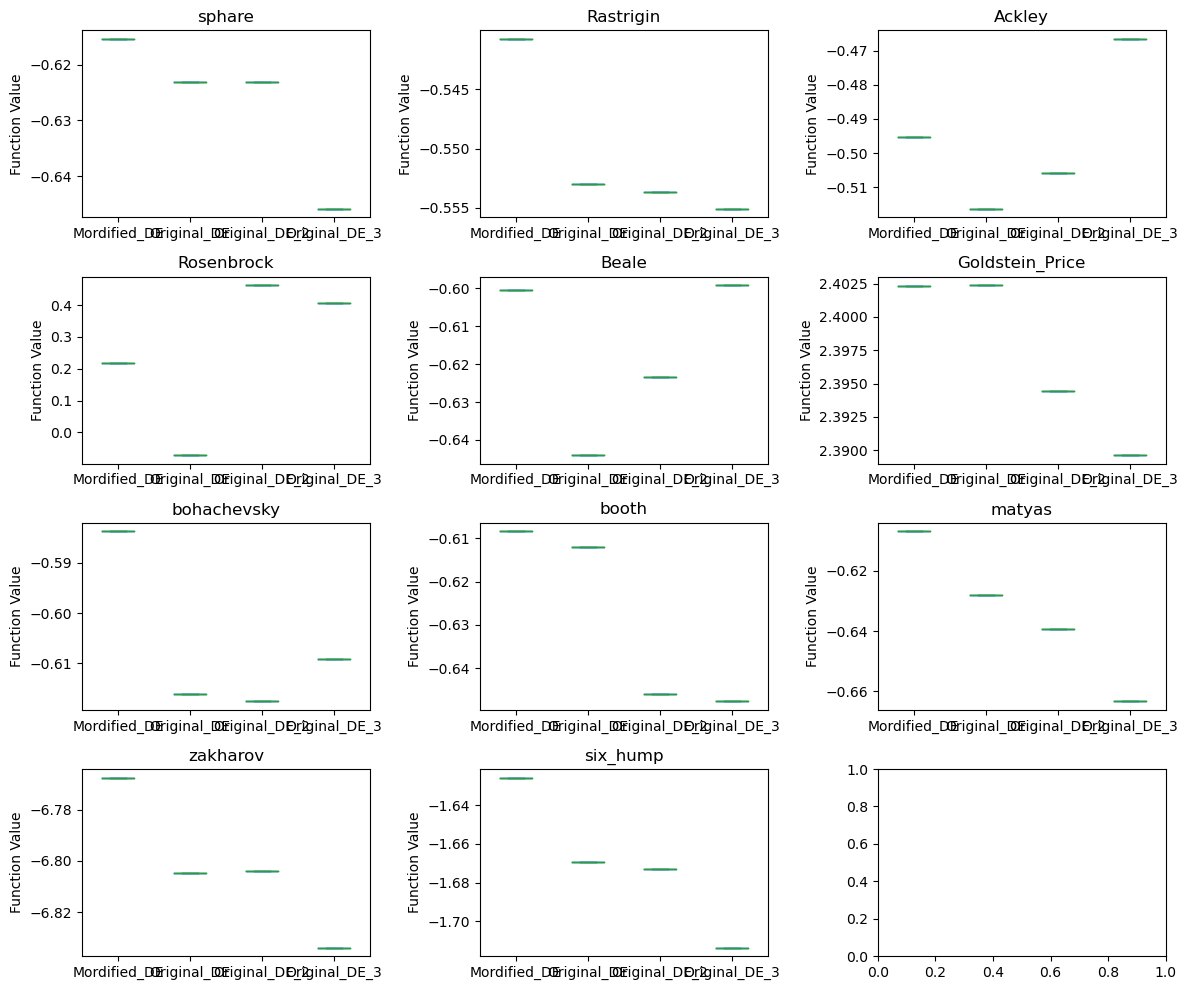

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import math

data = {
    'Function': ['sphare', 'Rastrigin', 'Ackley', 'Rosenbrock', 'Beale', 'Goldstein_Price', 'bohachevsky', 'booth', 'matyas', 'zakharov', 'six_hump'],
    'Mordified_DE': [-0.61536, -0.54072, -0.49522, 0.21690, -0.60050, 2.40229, -0.58374, -0.60839, -0.60690, -6.76738, -1.62569],
    'Original_DE': [-0.62310, -0.55298, -0.51636, -0.07106, -0.64400, 2.40239, -0.61606, -0.61211, -0.62808, -6.80470, -1.66950],
    'Original_DE_2': [-0.62309, -0.55366, -0.50584, 0.46265, -0.62333, 2.39448, -0.61755, -0.64602, -0.63929, -6.80411, -1.67295],
    'Original_DE_3': [-0.64586, -0.55510, -0.46653, 0.40690, -0.59914, 2.38964, -0.60921, -0.64765, -0.66334, -6.83394, -1.71367]
}

df = pd.DataFrame(data)

num_plots = len(df['Function'])
num_cols = 3  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

for i, function in enumerate(df['Function']):
    row = i // num_cols
    col = i % num_cols
    
    function_data = df[df['Function'] == function].drop('Function', axis=1)
    function_data.plot(kind='box', title=function, ax=axes[row, col])
    axes[row, col].set_ylabel('Function Value')

plt.tight_layout()
plt.show()

In [ ]:
# Create DataFrames for raw results
raw_results_df = pd.DataFrame(results[algorithm.__name__])

# Save raw results DataFrame to CSV
raw_results_df.to_csv('raw_results.csv', index_label='Function')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw results CSV file generated from the code
raw_results_df = pd.read_csv('raw_results.csv', index_col=0)

# Select the columns corresponding to the algorithms
algorithm_columns = ['Mordified_DE', 'Original_DE', 'Original_DE_2', 'Original_DE_3']

# Filter the raw results data for the selected algorithms
algorithm_data = raw_results_df[algorithm_columns]

# Create box plots for each algorithm's raw results
algorithm_data.plot(kind='box', vert=False, figsize=(10, 8))
plt.xlabel('Function Value')
plt.ylabel('Algorithms')
plt.title('Box Plots of Raw Algorithm Results for Different Functions')
plt.show()